In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar os dados
df = pd.read_csv('fcc-forum-pageviews.csv')

# Definir a coluna 'date' como índice
df.set_index('date', inplace=True)

# Limpar os dados filtrando os dias com visualizações de página nos 2,5% maiores e menores
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

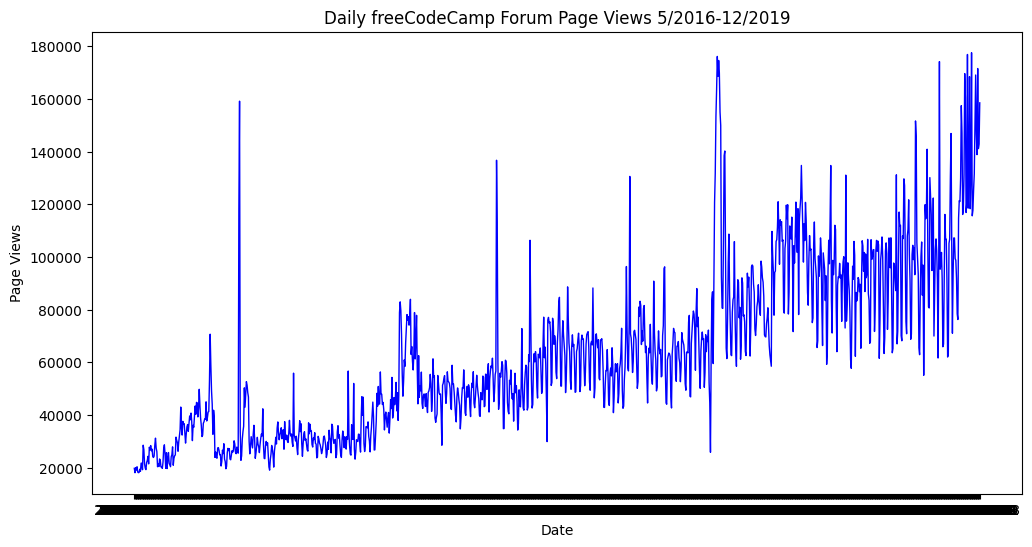

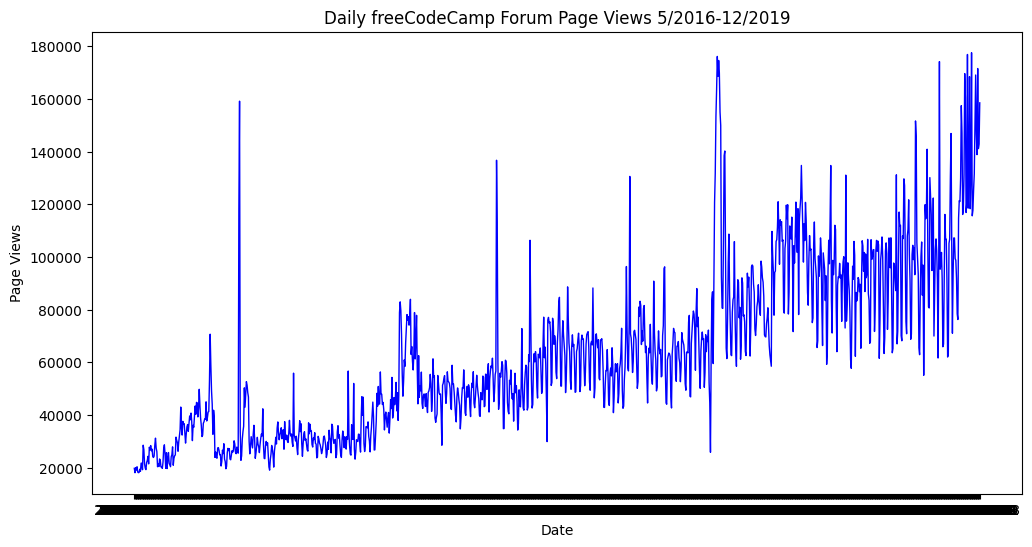

In [18]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='blue', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.savefig('line_plot.png')
    return fig

# Chamar a função para gerar a imagem
draw_line_plot()

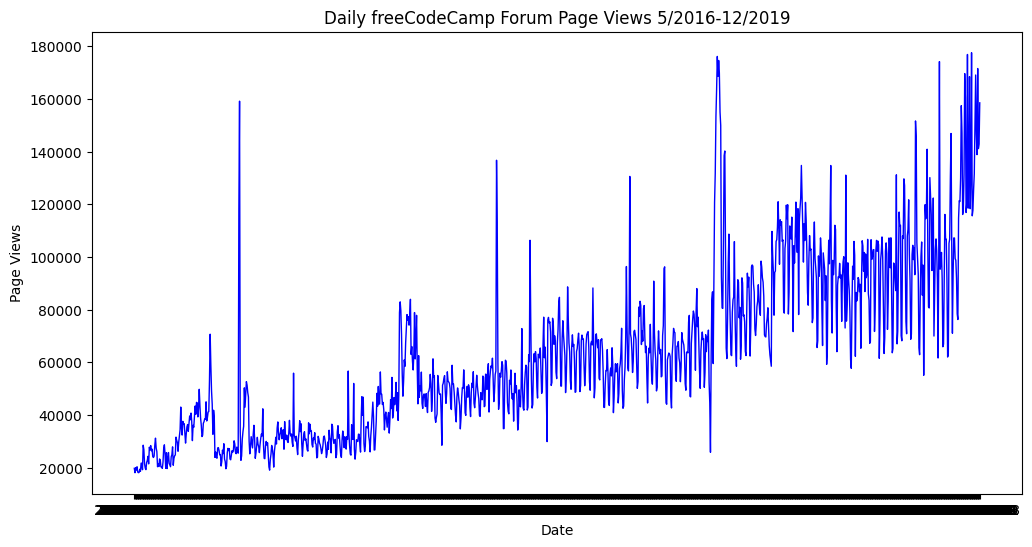

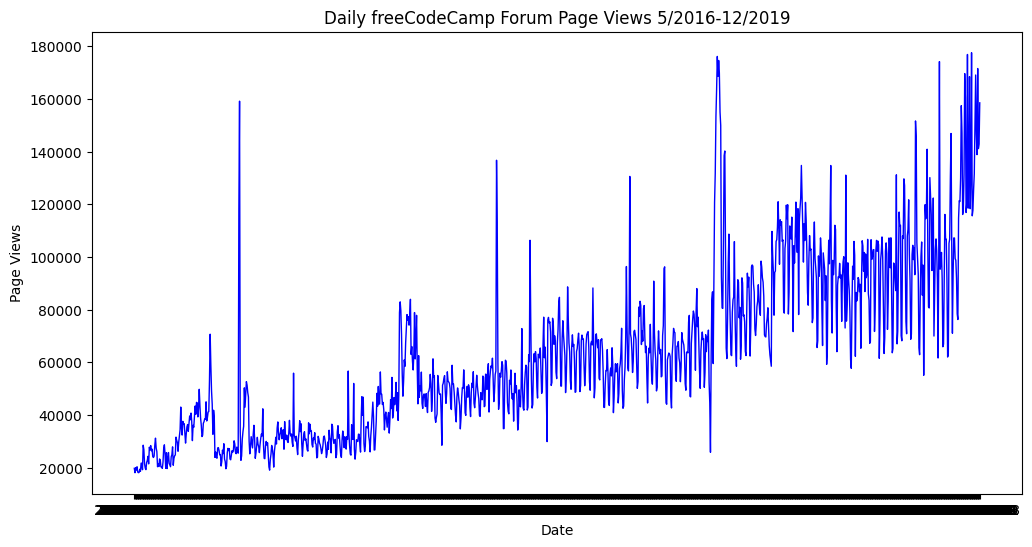

In [19]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(df.index, df['value'], color='blue', linewidth=1)
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    plt.savefig('line_plot.png')
    return fig

# Chamar a função para gerar a imagem
draw_line_plot()


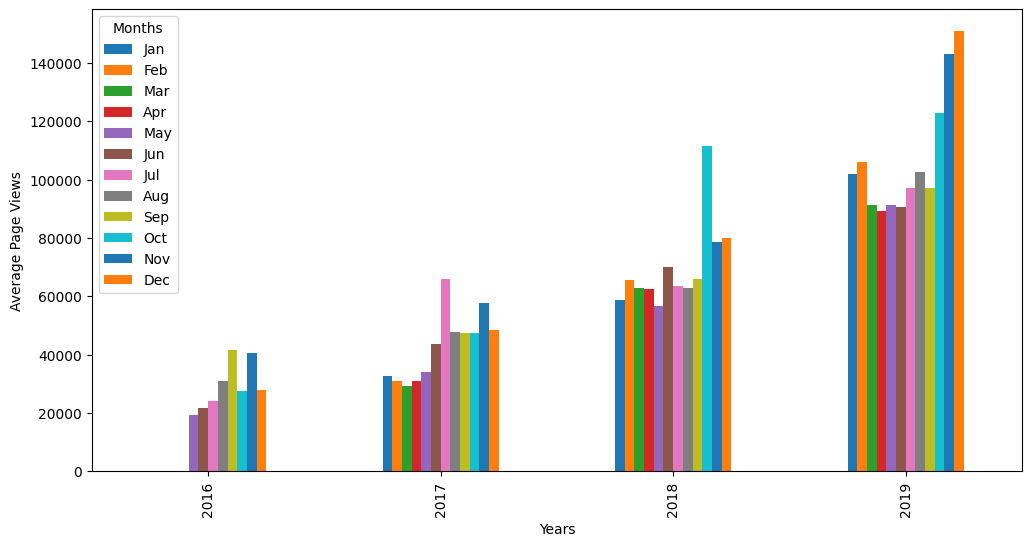

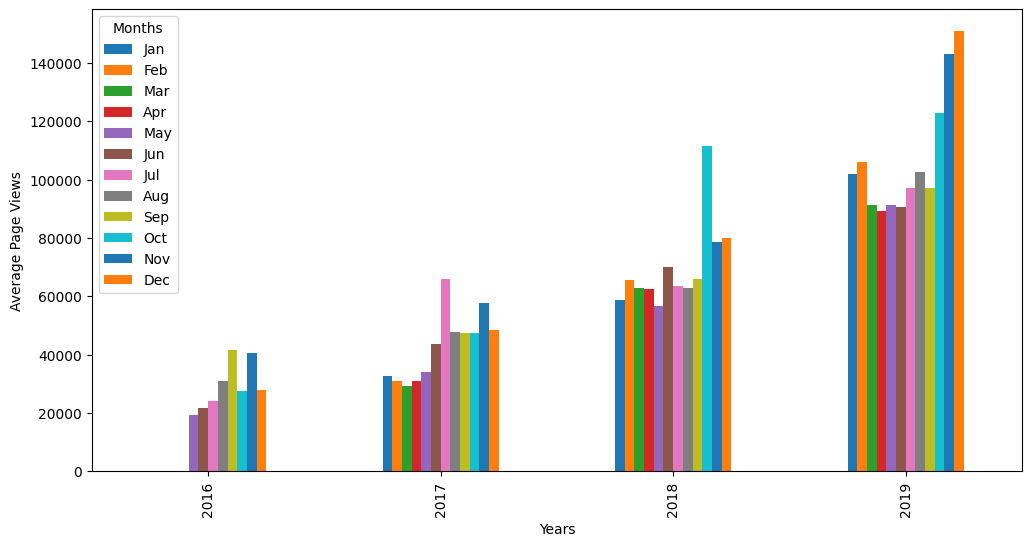

In [20]:
def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
    df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()

    fig = df_bar.plot(kind='bar', figsize=(12, 6), legend=True).figure
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months', labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.savefig('bar_plot.png')
    return fig

# Chamar a função para gerar a imagem
draw_bar_plot()

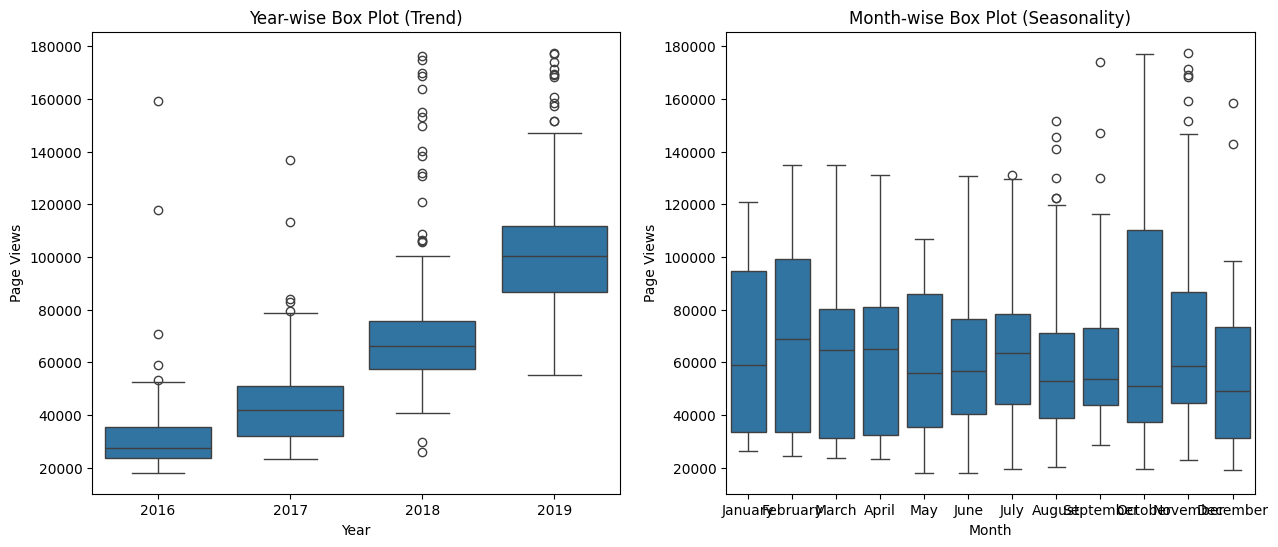

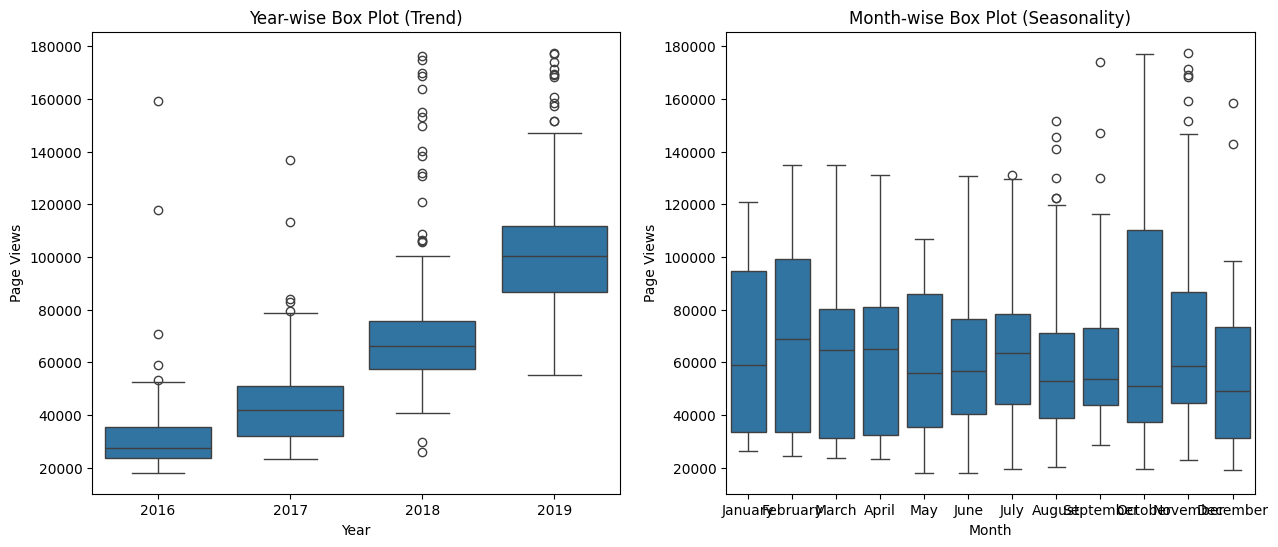

In [21]:
def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = pd.DatetimeIndex(df_box['date']).year
    df_box['month'] = pd.DatetimeIndex(df_box['date']).month_name()

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    plt.savefig('box_plot.png')
    return fig

# Chamar a função para gerar a imagem
draw_box_plot()